## CodeClause Internship Project - Road Lane Detection
Intern ID - CC51516

Intern Name - Sahib Preet Singh

Designation - Artificial Intelligence Intern

### Project Description
This project is based on the detection of road lanes. It is the base step of creating a self driving car project. In this I have collected trainig data from kaggle and captured the testing data on my own that is totally original. 

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import cv2


In [59]:
img1 = mpimg.imread("C:\python\CodeClauseInternship_RoadLaneDetection\images\swr.jpg")
yheight1 = img1.shape[0]
xwidth1 = img1.shape[1]

img2 = mpimg.imread("C:\python\CodeClauseInternship_RoadLaneDetection\images\syl.jpg")
yheight2 = img2.shape[0]
xwidth2 = img2.shape[1]

### Pre-processing of the image using
1. Grayscale method 
2. Gaussian blur

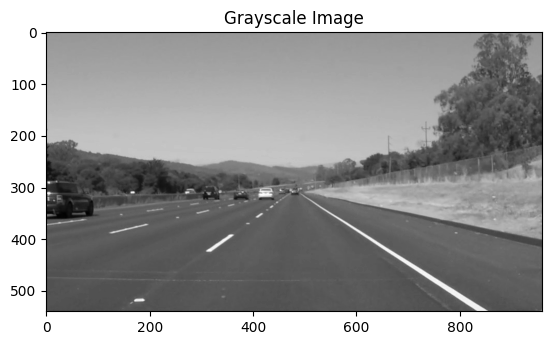

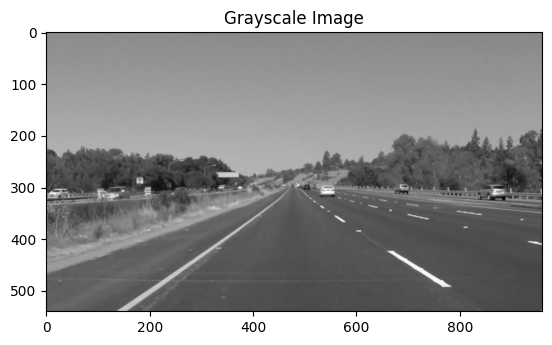

In [42]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
graying1 = grayscale(img1)
graying2 = grayscale(img2)
plt.title("Grayscale Image")
plt.imshow(graying1, cmap='gray')
plt.show()
plt.title("Grayscale Image")
plt.imshow(graying2, cmap='gray')
plt.show()

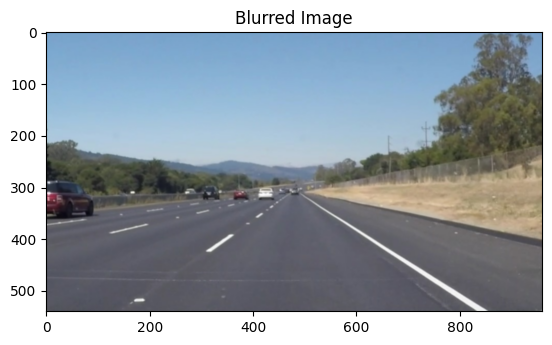

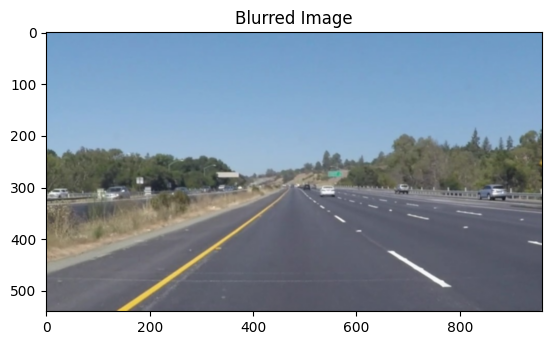

In [46]:
def gaussian_blur(image, kernel):
    return cv2.GaussianBlur(image, (kernel, kernel), 0)
 
ksize = 3
gaussianBlur1 = gaussian_blur(img1, ksize)
gaussianBlur2 = gaussian_blur(img2, ksize)
plt.imshow(gaussianBlur1, cmap='gray') 
plt.title("Blurred Image")
plt.show()
plt.imshow(gaussianBlur2, cmap='gray')
plt.title("Blurred Image")
plt.show()

### Canny Edge Detection

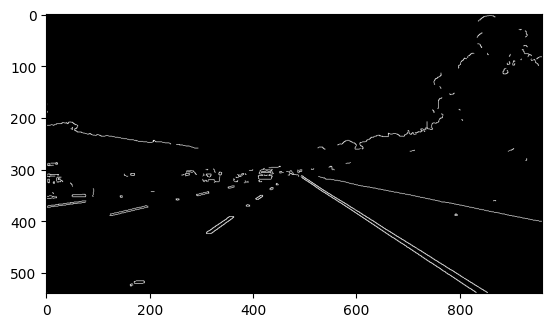

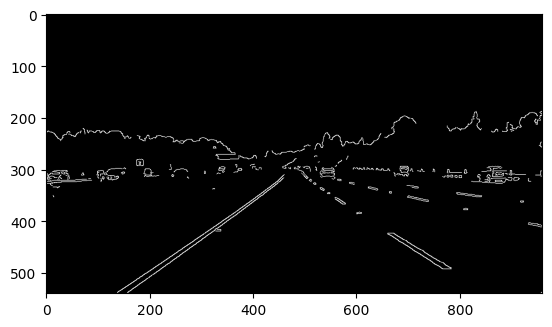

In [84]:
def canny(img, low_threshold, high_threshold):
        return cv2.Canny(img, low_threshold, high_threshold)

minTh = 150
maxTh = 220
edgeDetectedImage1 = canny(gaussianBlur1, minTh, maxTh)
plt.imshow(edgeDetectedImage1, cmap="Greys_r")
plt.show()
edgeDetectedImage2 = canny(gaussianBlur2, minTh, maxTh)
plt.imshow(edgeDetectedImage2, cmap="Greys_r")
plt.show()

### Region Masking

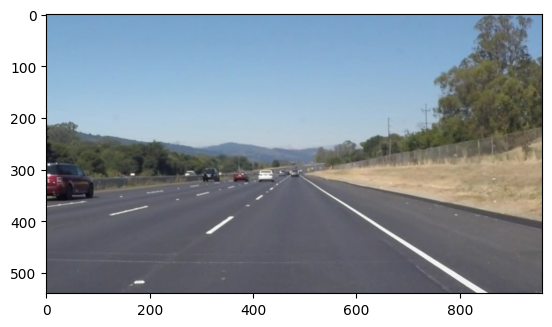

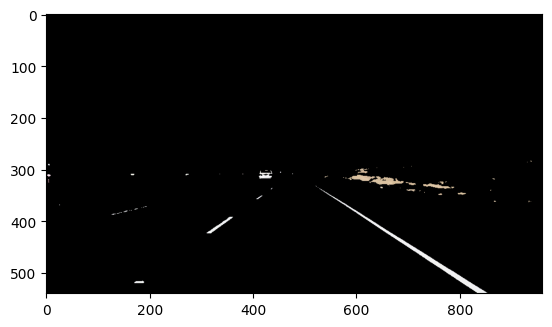

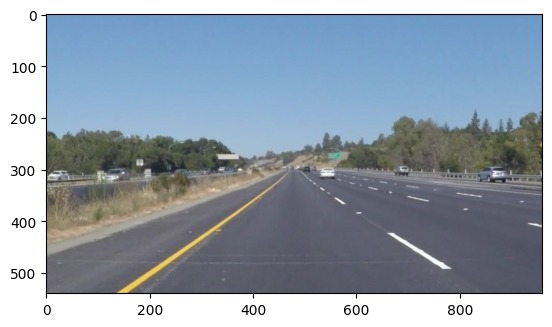

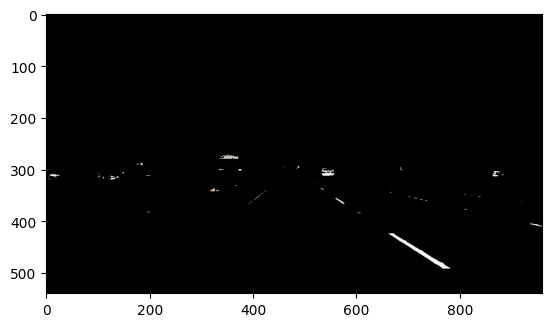

In [70]:
line_image1 = np.copy(img1)
line_image2 = np.copy(img2)

#Defining criteria of selecting colour threshold variables and Let threshold be th
red_th = 210
green_th = 180
blue_th = 150

thresholds_for1 = (img1[:,:,0] < red_th) \
                | (img1[:,:,1] < green_th) \
                | (img1[:,:,2] < blue_th)

thresholds_for2 = (img2[:,:,0] < red_th) \
            | (img2[:,:,1] < green_th) \
            | (img2[:,:,2] < blue_th)

line_image1[thresholds_for1] = [0,0,0]
line_image2[thresholds_for2] = [0,0,0]

plt.imshow(img1)
plt.show()
plt.imshow(line_image1)
plt.show()

plt.imshow(img2)
plt.show()
plt.imshow(line_image2)
plt.show()

In [71]:
l_bottom = np.array([100, 539])
r_bottom = np.array([950, 539])
apex = np.array([480, 290])

#As we go ahead, road somewhat assumes to be triangle in shape, though it is not so we will make a line fit on the 3 sides
fit_l = np.polyfit((l_bottom[0], apex[0]), (l_bottom[1], apex[1]), 1)
fit_r = np.polyfit((r_bottom[0], apex[0]), (r_bottom[1], apex[1]), 1)
fit_b = np.polyfit((l_bottom[0], r_bottom[0]), (l_bottom[1], r_bottom[1]), 1)

print(fit_l)
print(fit_r)
print(fit_b)




[ -0.65526316 604.52631579]
[ 0.52978723 35.70212766]
[-7.90229623e-17  5.39000000e+02]


In [87]:
# Marking Region
x_cord1, y_cord1 = np.meshgrid(np.arange(0,xwidth1), np.arange(0,yheight1))
x_cord2, y_cord2 = np.meshgrid(np.arange(0,xwidth2), np.arange(0,yheight2))

region_th1 = (y_cord1 > (x_cord1*fit_l[0]  + fit_l[1])) & \
            (y_cord1 > (x_cord1*fit_r[0]  + fit_r[1])) & \
            (y_cord1 > (x_cord1*fit_b[0] + fit_b[1]))

region_th2 = (y_cord2 > (x_cord2*fit_l[0]  + fit_l[1])) & \
            (y_cord2 > (x_cord2*fit_r[0]  + fit_r[1])) & \
            (y_cord2 > (x_cord2*fit_b[0] + fit_b[1]))\
            
#for region selection            
line_image1[thresholds_for1 | ~region_th1] = [0,0,0]
line_image2[thresholds_for2 | ~region_th2] = [0,0,0]

#for color markings
color_select1 = np.copy(img1)
color_select2 = np.copy(img2)

color_select1[~thresholds_for1 | region_th1] = [255,255,0]
color_select2[~thresholds_for2 | region_th2] = [255,255,0]


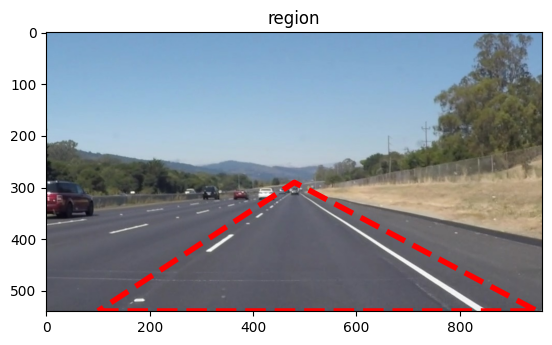

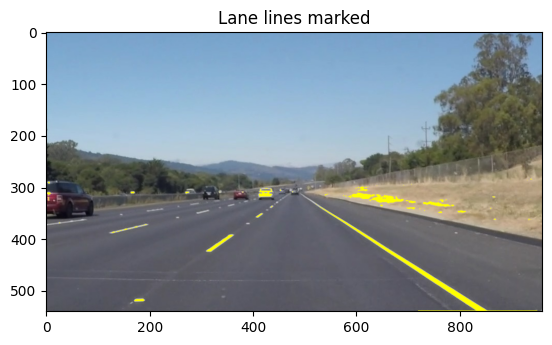

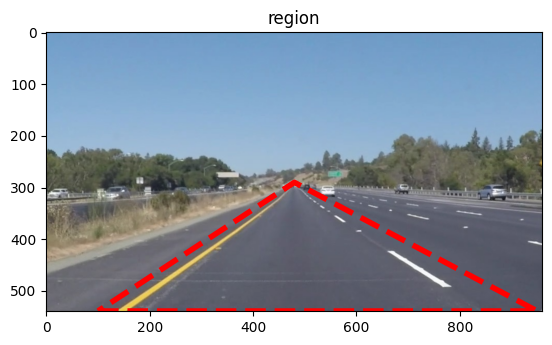

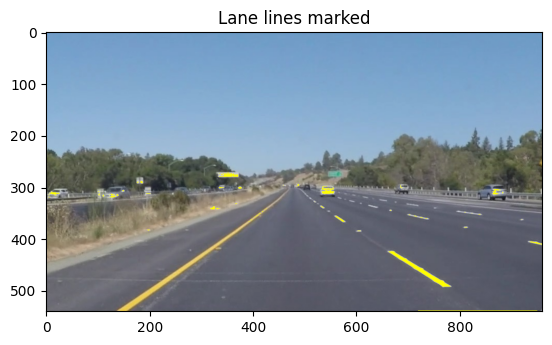

In [88]:
# Plot the result for 1
plt.imshow(img1)
x = [l_bottom[0], r_bottom[0], apex[0], l_bottom[0]]
y = [l_bottom[1], r_bottom[1], apex[1], l_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("region")
plt.show()
plt.imshow(color_select1)
plt.title("Lane lines marked")
plt.show()

# Plot the result for 2
plt.imshow(img2)
x = [l_bottom[0], r_bottom[0], apex[0], l_bottom[0]]
y = [l_bottom[1], r_bottom[1], apex[1], l_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("region")
plt.show()
plt.imshow(color_select2)
plt.title("Lane lines marked")
plt.show()



On observing we can infer that yellow bold line is not marked green here, so let us improve our model

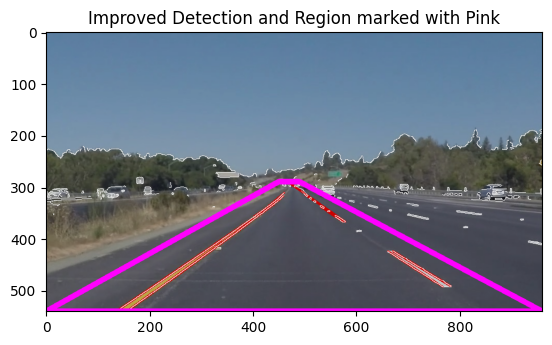

In [102]:
mask = np.zeros_like(edgeDetectedImage2)   
ignore_mask_color = 255 
imshape = img2.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edgeDetectedImage2, mask)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    global lines
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), 
              minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)   
    return line_img
    
    
#hough lines
rho = 1
theta = np.pi/180
threshold = 30
min_line_len = 20 
max_line_gap = 20

houged = hough_lines(masked_edges, rho, theta, 
                  threshold, min_line_len, max_line_gap)

for i in lines:
    for x1,y1,x2,y2 in i:
        cv2.line(img2, (x1, y1), (x2, y2), [255, 0, 0], 2)

color_edge = np.dstack((edgeDetectedImage2, edgeDetectedImage2, edgeDetectedImage2))
combo = cv2.addWeighted(img2, 0.8, color_edge, 1, 0)
combo1 = cv2.polylines(combo, vertices, True, (255,0,255), 10)
plt.title("Improved Detection and Region marked with Pink")
plt.imshow(combo)
plt.show()